## POINTS 1-3)

In [9]:
# Libraries du hase
#change1
import os
import sqlite3
import fnmatch
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from pstats import Stats
#from pstats import StatsProfile
import statsmodels.api as sm
import seaborn as sns

import pylab as py

# Settings for seaborn
#sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('combined_loc.csv',
                 sep=',',
                 encoding='latin-1')

df


,Datum,brand,addresse,diesel,bleifrei,lat,lon
0,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743
1,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743
2,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743
3,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743
4,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743
...,...,...,...,...,...,...,...
2408,04.05.2016,Auto Bellinzona Nord Sagl,"Via S. Gottardo 57B, 6500 Bellinzona",1.320,1.330,46.203907,9.034014
2409,02.02.2016,Reisch AG,"Hauptstr. 24, 8573 Siegershausen",1.320,1.270,47.611435,9.169731
2410,04.05.2016,Auto Lugano,"Via Cantonale, 6983 Magliaso",1.319,1.279,45.985931,8.891774
2411,22.12.2020,Ruedi RÃ¼ssel,"Luzernstr. 60, 4553 Subingen",1.310,1.260,47.193531,7.621964


## 4) EDA Part

In [11]:
df.describe()

,diesel,bleifrei,lat,lon
count,2413.000000,2413.000000,1794.000000,1794.000000
mean,1.819246,1.678922,47.078806,8.365420
std,0.288732,0.221809,0.451144,0.810042
min,1.120000,1.140000,45.833527,5.971094
25%,1.570000,1.500000,46.896875,7.721382
50%,1.770000,1.670000,47.198078,8.462198
75%,2.090000,1.830000,47.417451,8.941109
max,2.395000,2.230000,47.792210,10.455905


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [12]:
#asdf Preis
print('Preis:',
      'Count:', round(df.diesel.count(), 1),
      'Min:', round(df.diesel.min(), 1),
      'Max:', round(df.diesel.max(), 1),
      'Mean:', round(df.diesel.mean(), 1),
      'Median:', round(df.diesel.median(), 1),
      'Std:', round(df.diesel.std(), 1))

# Preis2
print('Preis2:',
      'Count:', round(df.bleifrei.count(), 1),
      'Min:', round(df.bleifrei.min(), 1),
      'Max:', round(df.bleifrei.max(), 1),
      'Mean:', round(df.bleifrei.mean(), 1),
      'Median:', round(df.bleifrei.median(), 1),
      'Std:', round(df.bleifrei.std(), 1))

# Datum
print('Datum:',
      'Count:', round(df.lat.count(), 1),
      'Min:', round(df.lat.min(), 1),
      'Max:', round(df.lat.max(), 1),
      'Mean:', round(df.lat.mean(), 1),
      'Median:', round(df.lat.median(), 1),
      'Std:', round(df.lat.std(), 1))

Preis: Count: 2413 Min: 1.1 Max: 2.4 Mean: 1.8 Median: 1.8 Std: 0.3
Preis2: Count: 2413 Min: 1.1 Max: 2.2 Mean: 1.7 Median: 1.7 Std: 0.2
Datum: Count: 1794 Min: 45.8 Max: 47.8 Mean: 47.1 Median: 47.2 Std: 0.5


In [13]:
# Quantiles
df.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

# Skewness
df.skew()

#Kurtosis
df.kurtosis()

diesel     -1.135745
bleifrei   -0.571844
lat         0.353816
lon        -0.367534
dtype: float64

### Multivariate non-graphical exploratory data analysis (EDA)

In [15]:
#Cross- tabulation
pd.crosstab(df['lat'], df['lon'])

bleifrei,1.140,1.250,1.260,1.270,1.275,1.279,1.280,1.290,1.295,1.300,...,2.179,2.180,2.190,2.195,2.200,2.210,2.219,2.220,2.229,2.230
diesel,,,,,,,,,,,,,,,,,,,,,
1.120,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.300,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.310,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.319,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.320,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.360,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2.369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
#Pivot table
pd.pivot_table(df[['bleifrei', 'diesel', 'bleifrei', 'diesel']],
               index=['bleifrei'],
               values=['bleifrei', 'diesel', 'bleifrei'],
               aggfunc=np.mean)

ValueError: Grouper for 'bleifrei' not 1-dimensional

In [17]:
#Correlation matrix
corr = df.corr()
corr

#Covariance matrix
cov = df.cov()
cov

,diesel,bleifrei,lat,lon
diesel,0.083366,0.060849,-0.017594,0.009495
bleifrei,0.060849,0.049199,-0.018291,0.001402
lat,-0.017594,-0.018291,0.203531,0.041361
lon,0.009495,0.001402,0.041361,0.656167


### Univariate graphical exploratory data analysis (EDA)

<AxesSubplot: xlabel='bleifrei'>

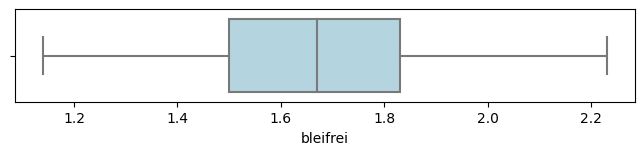

In [19]:
# Boxplot
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['bleifrei'], color="lightblue")

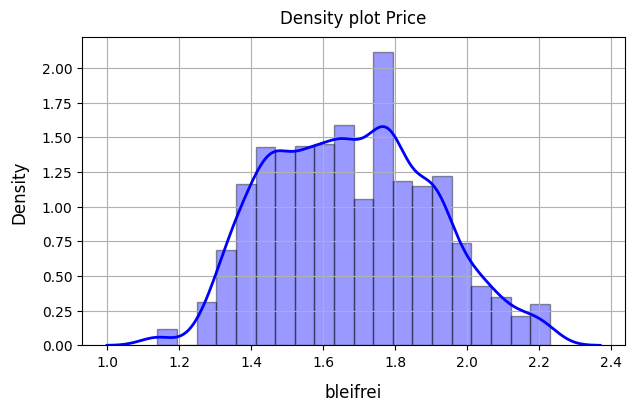

In [20]:
# Density plot
plt.figure(figsize=(7,4))
sns.distplot(df['bleifrei'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot Price', fontsize=12, pad=10)
plt.xlabel('bleifrei', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

          price         km
862         0.0  -0.527034
1873        0.0  -0.527034
595         0.0  -0.527034
597         0.0  -0.527034
598         0.0  -0.527034
...         ...        ...
187    479740.0   6.612707
2409   629990.0   8.848806
1674   650500.0   9.154046
933   1400000.0  20.308496
1648  1990000.0  29.089183

[2874 rows x 2 columns]


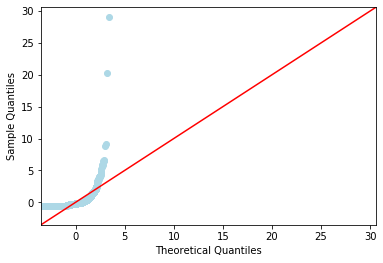

In [ ]:
#Quantile-Quantile-Plot

df_qq = df
df_qq['km'] = (df['price']-df['price'].mean()) / df['price'].std()
print(df_qq.sort_values('km')[['price', 'km']])
    
# Plot
sm.qqplot(df_qq['km'], line ='45', color = 'lightblue')
py.show()

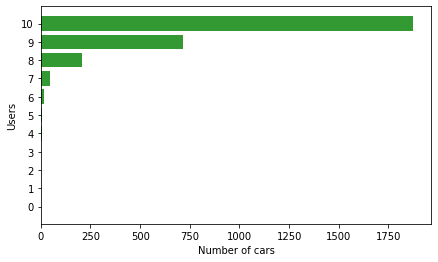

In [ ]:
# Barchart
df_bar = df['users'].value_counts().nlargest(12).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos)
ax.set_xlabel('Number of cars', fontsize=10)
ax.set_ylabel('Users', fontsize=10)

# Show graph
plt.show()

### Multivariate graphical exploratory data analysis (EDA)

ConversionError: Failed to convert value(s) to axis units: array(['4.9', '9.2', '7', ..., nan, '5,3', '5'], dtype=object)

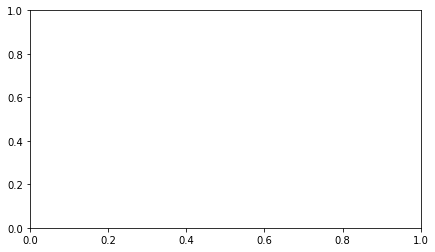

In [ ]:
# Scatterplot with linear regression
plt.figure(figsize=(7,4))
plt.plot(df[['price',
             'consumption']], 
            'o', 
            markersize=3.5,
            color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df['price'], df['consumption'], 1)
print(b)
print(a)

# Plot regression line
plt.plot(df['price'], 
         b*df['price'] + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('consumption', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

## 5) Regression

### Simple linear regression (only one explanatory variable in the model) KM ODER Price

In [21]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['bleifrei'], 
                                                    df['diesel'], 
                                                    test_size=0.5, 
                                                    random_state=30)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
0       1.14
662     1.79
1801    1.53
2391    1.25
1939    1.45
Name: bleifrei, dtype: float64 

y_train:
0       1.12
662     2.09
1801    1.58
2391    1.36
1939    1.53
Name: diesel, dtype: float64


In [22]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            -0.25
Slope of regression line (beta):          1.234
p-value:                                  0.0000
R-squared (coefficient of determination): 0.9052


### Plot regression line

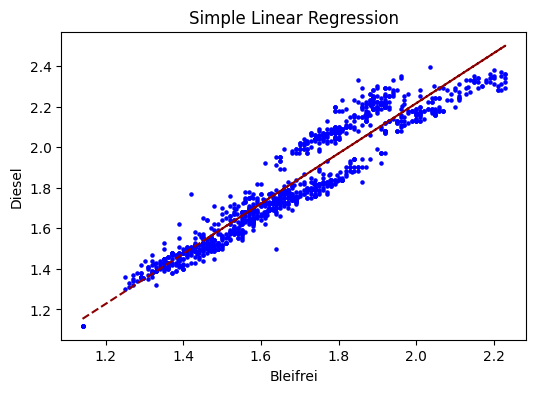

In [24]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept


# Apply myfunc() to x, i.e. make predictions
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, s=5, color='blue')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Bleifrei')
plt.ylabel('Diesel')

plt.show()


### Check model residuals (residuals = predicted values minus observed val

In [25]:
# Calculate residuals (here: predicted prices minus observed prices)
residuals = mymodel - y_train

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 1.15
1st Observed price in dataset: 1.12
1st Residual price in dataset: 0.03


## 6 & 7) Measures of fit and interpretation

For Interpretation of our simple linear regression we use the R-squared value, which should be near 1 if the model should have a high goodness of fit, and the RMSE-value, which indicates how much the model predictions differ onn average from the observed values.
Additionally we plot the Histogram of the residuals, with which we can visualize the differences between the model values and the actual values. 

In [ ]:
#R^2
print(f'R-squared (coefficient of determination): {r**2:.4f}')

R-squared (coefficient of determination): 0.0472


In [ ]:
#RMSE
MSE = np.square(np.subtract(y_train, mymodel)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

70013.30162397183


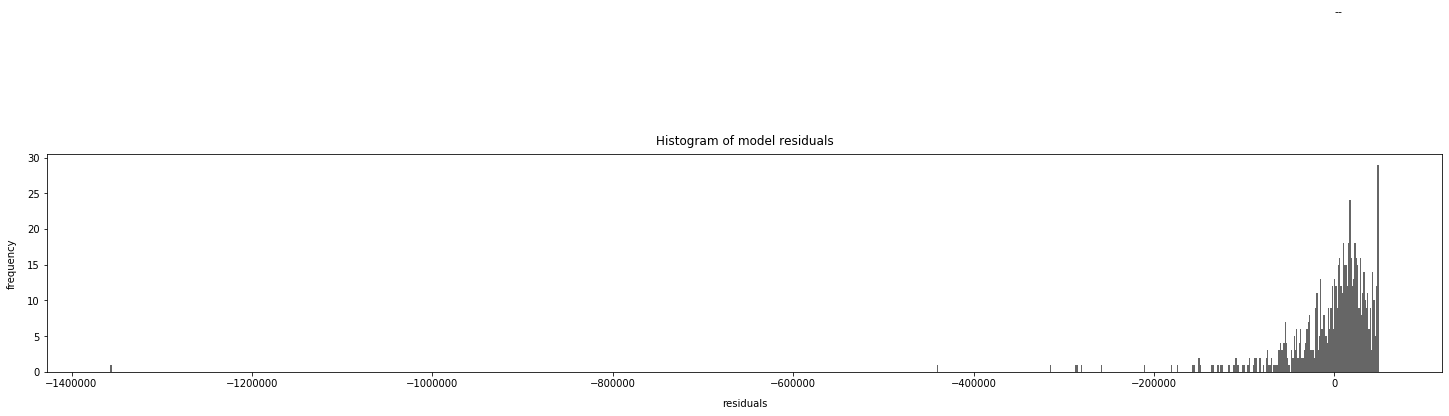

In [ ]:
#Histogram of residuals
fig = plt.figure(figsize=(25, 4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=1000, 
                            color='black',
                            alpha=0.6
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Add text annotation
plt.text(-50, 50, s="--", 
         fontsize=11, 
         color="black")

# Show plot
plt.show()


#Interpretation:
R-squared: the value is in the bottom half between 0 and 1, which means the model doesn't have a high goodness-of-fit.
RMSE: The value is very high with 70'000 euro difference in average between the predicted value and the observed value.
Histogram of model residuals: As visualized in the histogram of model residual, it is left-skewed. That is because we have much higher price differences, the higher we go price-wise.

### ANOVA Analysis

H0: the means of the car prices per brand are the same;  
H1: the means of the car prices per brand are not the same   
--> compared will be the three brands: Ferrari, Lamborghini and McLaren

In [ ]:
#defining dataframe and remove outliers
df_anova = df[['brand', 'price (euro)']]
threshold = 400000
df_anova = df_anova[df_anova['price (euro)'] < threshold]
df_anova.head()

,brand,price (euro)
0,Volkswagen,25980.0
1,Porsche,89800.0
2,Mercedes-Benz,36999.0
3,Mercedes-Benz,44480.0
4,Opel,16880.0


In [ ]:
#pivot-table
table = pd.pivot_table(df_anova, 
                       values='price (euro)',
                       columns=['brand'], 
                       aggfunc=np.mean)
print(table)

brand          Abarth  Aiways          Alfa    Alpina   Alpine     Aston  \
price (euro)  19642.0     0.0  22933.378378  164900.0  65330.0  187825.6   

brand                 Audi   Austin  Austin-Healey  Autobianchi  ...  \
price (euro)  35735.041009  52000.0         4990.0        900.0  ...   

brand                Skoda       Sonstige     SsangYong        Subaru  Suzuki  \
price (euro)  24217.267857  116032.857143  29456.666667  14237.857143  9867.5   

brand                Tesla       Toyota  Triumph   Volkswagen        Volvo  
price (euro)  18435.714286  8108.743243  33500.0  18779.59322  8772.339623  

[1 rows x 77 columns]


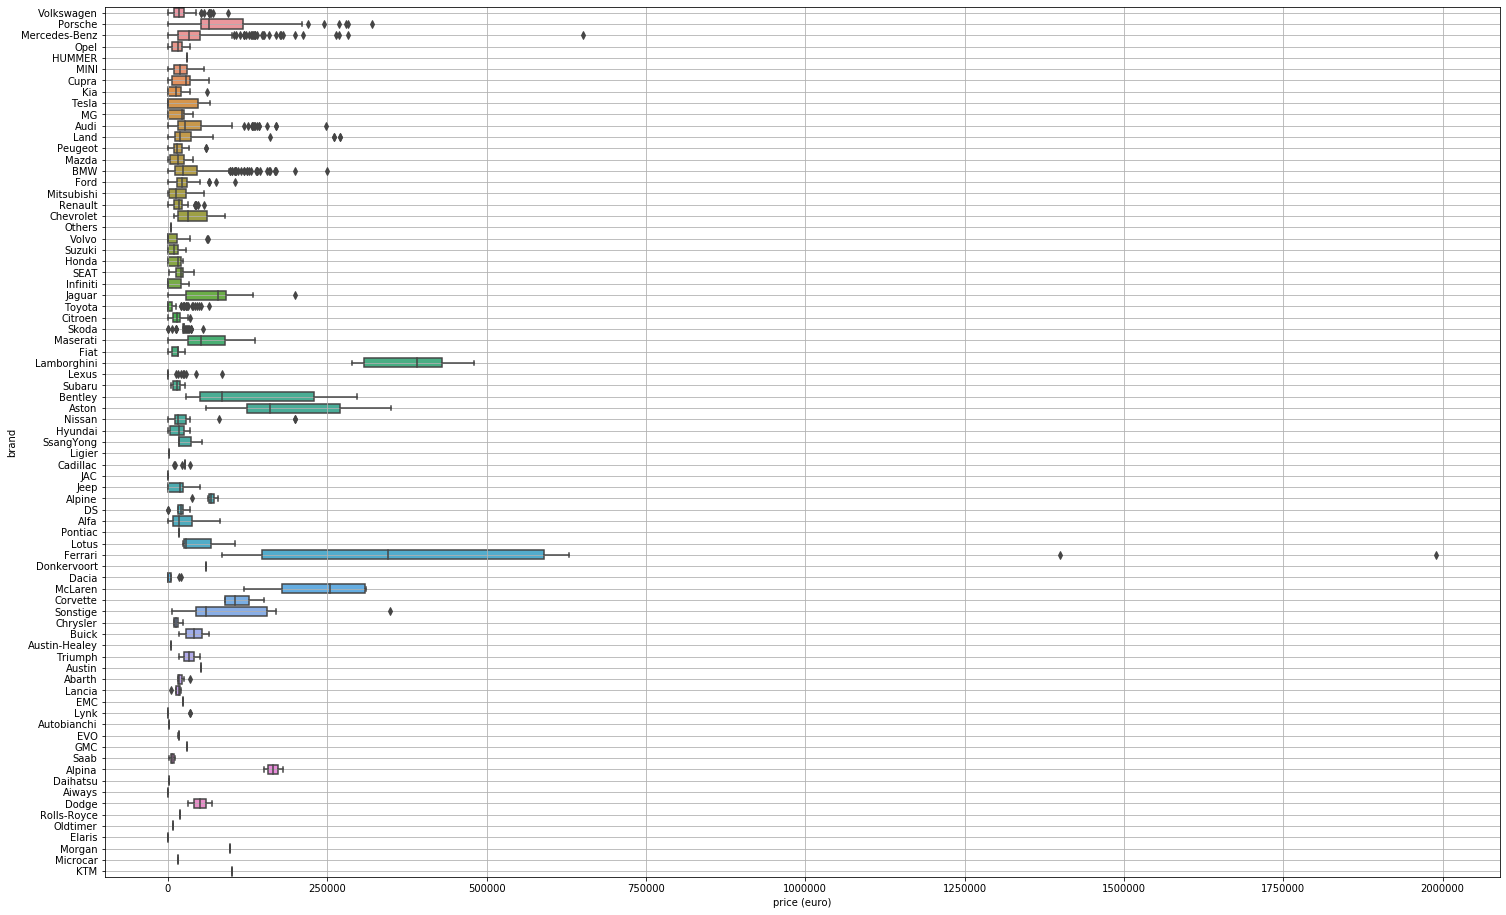

In [ ]:
#Boxplots
plt.figure(figsize=(25, 16))
ax = sns.boxplot(x="price (euro)",
                 y="brand",
                 data=df,
                 orient='h')
plt.grid()
plt.show()

In [ ]:
# Create subsets (groups)
rMcLaren = df_anova.loc[df_anova['brand'] == 'McLaren']['price (euro)']
rFerrari = df_anova.loc[df_anova['brand'] == 'Ferrari']['price (euro)']
rLamborghini = df_anova.loc[df_anova['brand'] == 'Lamborghini']['price (euro)']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(rFerrari, rLamborghini)

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 41.278 p-value 0.0001


#Interpretation   
Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the price per m2 differ between apartments with 2.5, 3.5 and 4.5 rooms. 